In [153]:
import numpy as np
import random

b = np.array([1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]) # bedrooms
p = np.array([120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]) ## Prices

sample_size = 10 # sample size
sample_b =np.random.choice(b,sample_size)
print('Sample bedrooms:',sample_b)

# mean and standard deviation of the sample
sample_mean =np.mean(sample_b)
sample_std = np.std(sample_b)
print(f"Mean of bedroom sample = {sample_mean}\nStandard deviation of sample bedroom = {sample_std}")

# confidence interval of 95% using the sample
z = 1.9 
# standard error SE = z*(sample_std/sqrt(size))
SE = z*(sample_std/np.sqrt(10)) 

#CI = sample_mean +- SE
# upper level confidence
ULC = sample_mean + SE
print ("Upper confidence level at 95 % is ", ULC)

# lower level confidence
LLC = sample_mean - SE
print ("Lower confidence level at 95 % is ", LLC)

# population mean
pop_mean = np.mean(b)
print("Population mean = ", pop_mean)

if LLC < pop_mean <  ULC:
    print("Population mean lies within confidence interval")
else:
    print("Population mean doesnot lies within confidence interval") 

Sample bedrooms: [4 3 6 6 6 2 5 3 4 3]
Mean of bedroom sample = 4.2
Standard deviation of sample bedroom = 1.4
Upper confidence level at 95 % is  5.041165857604789
Lower confidence level at 95 % is  3.3588341423952115
Population mean =  3.0
Population mean doesnot lies within confidence interval


In [157]:
#covariance and the correlation between the bedrooms and prices
cov_b_p = np.cov(b,p)
print(f"Covariance between the bedrooms and prices is\n{cov_b_p} ")

cor_b_p = np.corrcoef(b,p)
print(f"\nCorrelation between the bedrooms and prices is\n{cor_b_p.round(3)} ")

Covariance between the bedrooms and prices is
[[1.89473684e+00 1.33894737e+02]
 [1.33894737e+02 1.00161553e+04]] 

Correlation between the bedrooms and prices is
[[1.    0.972]
 [0.972 1.   ]] 


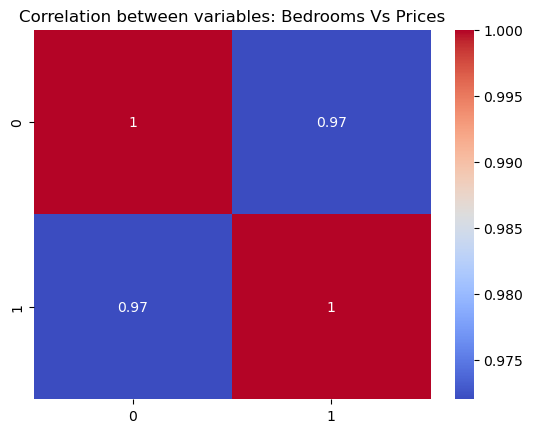

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor_b_p.round(3), annot=True, cmap='coolwarm')
plt.title("Correlation between variables: Bedrooms Vs Prices")
plt.show()

In [160]:
#Build a regression model and estimate the regression parameters (slope and intercept).

# from scipy import stats
from sklearn.linear_model import LinearRegression

x = b.reshape(-1,1) # reshapig bedrooms to columns

# assigning price as y
y = p

model = LinearRegression().fit(x, y)

slope = model.coef_[0]
print("Slope =", slope)

intercept = model.intercept_
print("Intercept = ", intercept)

y_pred = model.predict(x),round(3)
print("y_pred =", y_pred)

# using scipy method
from scipy import stats
slope1, intercept1, r1, p1, std_err1 = stats.linregress(b, p)

print("\nslope1, intercept1, r1, p1, std_err1", slope1, intercept1, r1, p1, std_err1)

Slope = 70.6666666666667
Intercept =  39.449999999999875
y_pred = (array([110.11666667, 110.11666667, 110.11666667, 180.78333333,
       180.78333333, 180.78333333, 180.78333333, 251.45      ,
       251.45      , 251.45      , 251.45      , 251.45      ,
       251.45      , 251.45      , 322.11666667, 322.11666667,
       322.11666667, 392.78333333, 392.78333333, 463.45      ]), 3)

slope1, intercept1, r1, p1, std_err1 70.66666666666667 39.44999999999999 0.9719379327871166 9.25739530686155e-13 4.0313107110941875


In [139]:
#Predict the house price for a house with 7 rooms
# here number of rooms  = 7
# using model.predict()


bedrooms =7
ne_price = model.predict([[bedrooms]])

    
print(f"The house price for a house with 7 rooms is {np.round(ne_price,2)}")


The house price for a house with 7 rooms is [534.12]


In [119]:
# calculate the prediction interval
from scipy.stats import t

bedrooms = 7
x_mean = np.mean(x)
n = len(x) # lenght of x
# prediction interval
y_hat = model.predict([[x]])[0]
# predicted price of 7 rooms house 
price = 534.12

# residual
s_residual = np.sqrt(np.sum((y - y_hat)**2) / (n-2))

# standard error
s_yx = s_residual * np.sqrt(1 + 1/n + ((bedrooms - x_mean)**2) / np.sum((x - x_mean)**2))

# interval
alpha = 0.2
df = n-2
t_value = t.ppf(1-alpha/2, n-2)
interval = t_value * s_yx

# upper lower bounds
upper_bound = price + interval
lower_bound = price - interval

# print the prediction interval
print("Upper bound of prediction interval for 7 rooms is:", upper_bound.round(2))
print("Lower bound of prediction interval for 7 rooms is:", lower_bound.round(2))


Upper bound of prediction interval for 7 rooms is: 573.46
Lower bound of prediction interval for 7 rooms is: 494.78


In [164]:
# filter houses with 3 bedrooms
Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]
Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]
three_bedrooms = []
for i in range(len(Bedrooms)):
    if Bedrooms[i] == 3:
        three_bedrooms.append(Prices[i])

# calculate mean and standard deviation of prices with 3 bedrooms
mean3 = np.mean(three_bedrooms)
std_dev3 = np.std(three_bedrooms, ddof=1) 

print("Mean_3:", mean3)
print("Standard Deviation_3:", std_dev3)

alpha = 0.05
n = len(three_bedrooms)
df = n-1
k = 2.5 # two one sided tolerence interval


lower_bound_price = mean3 - k *(std_dev3/np.sqrt(n))
upper_bound_price = mean3 + k *(std_dev3/np.sqrt(n))

print("The lower price that can be payed for 3 rooms is ", lower_bound_price)
print("The highest price that can be payed for 3 rooms is ", upper_bound_price)

Mean_3: 246.57142857142858
Standard Deviation_3: 30.544269199841416
The lower price that can be payed for 3 rooms is  217.7098070425035
The highest price that can be payed for 3 rooms is  275.4330501003537
